In [1]:
#處理 array
import numpy as np

# Ackley multimodal function
from numpy import arange
from numpy import exp
from numpy import sqrt
from numpy import cos
from numpy import e
from numpy import pi

# 數學 π
import math
# 產生隨機 
import random
import sys

# 畫收斂圖
import matplotlib.pyplot as plt

In [2]:
class PSO():
    def __init__(self,pop_size,dimension,upper_bounds,lower_bounds,Ackley_objective_value,v=0.00,w=0.729844,c1=1.496180,c2=1.496180):

        self.pop_size = pop_size
        self.dimension = dimension
        self.upper_bounds = upper_bounds
        self.lower_bounds = lower_bounds

        self.solutions = [] # current solution\n",
        self.individual_best_solution = [] # individual best solution
        self.individual_best_objective_value = [] # individual best val

        self.global_best_solution = [] # global best solution
        self.global_best_objective_value = sys.float_info.max

        self.v = v # # 原慣性方向
        self.w = w # # 原慣性權重
        self.c1 = c1 # particle movement follows its own search experience (personalBest影響力)
        self.c2 = c2 # particle movement follows the swarm search experience(globalBest影響力)
        self.Ackley_objective_value = Ackley_objective_value

    def initialize(self):

        min_index = 0
        min_val = sys.float_info.max

        for i in range(self.pop_size):

            solution = []
            for d in range(self.dimension):
                rand_pos = self.lower_bounds[d]+random.random()*(self.upper_bounds[d]-self.lower_bounds[d])
                solution.append(rand_pos)
                #print(\"rand_pos\",rand_pos)

            self.solutions.append(solution)
            #print(\"solutions\",self.solutions)


            #update invidual best solution
            self.individual_best_solution.append(solution)
            objective_val = self.Ackley_objective_value(self.solutions[i][0],self.solutions[i][1])
            #print(\"objective_val\",objective_val)
            self.individual_best_objective_value.append(objective_val)

            #record the smallest objective val
            if(objective_val < min_val):
                min_index = i
                min_val = objective_val

        # udpate so far the best solution 初始化最佳 globalBest(初始粒子值最小的)
        self.global_best_solution = self.solutions[min_index].copy()
        self.global_best_objective_value = min_val
        #print("self.global_best_solution ",self.global_best_solution )
        #print("self.global_best_objective_value ",self.global_best_objective_value )
        
        return self.global_best_solution, self.global_best_objective_value
    
    # Transition
    def move_to_new_positions(self):
        for i,solution in enumerate(self.solutions):

            # personalBest影響權重
            alpha = self.c1 * random.random()
            # globalBest影響權重
            beta = self.c2 * random.random()

            for d in range(self.dimension):

                # 新慣性 = 原慣性 + 權重 * (個人最佳 - 原位置 ) + 權重 * (全域最佳 - 原位置 ) 
                v = w * self.v + alpha * (self.individual_best_solution[i][d]-self.solutions[i][d])+\
                    beta * (self.global_best_solution[d]-self.solutions[i][d])

                # 新位置 = 原位置 + 新慣性
                self.solutions[i][d] += v

                # 超過邊界拉回在邊界上
                self.solutions[i][d] = min(self.solutions[i][d],self.upper_bounds[d])
                self.solutions[i][d] = max(self.solutions[i][d],self.lower_bounds[d])

    def update_best_solution(self):

        for i,solution in enumerate(self.solutions):
            # Evaluation
            obj_val = self.Ackley_objective_value(self.solutions[i][0],self.solutions[i][1])

            # Determination
            # 更新 personal best
            if(obj_val < self.individual_best_objective_value[i]):
                self.individual_best_solution[i] = solution
                self.individual_best_objective_value[i] = obj_val

                # 更新 global best
                if(obj_val < self.global_best_objective_value):
                    self.global_best_solution = solution
                    self.global_best_objective_value = obj_val

In [3]:
#STEP0 初始化參數
# 迭代次數(Iteration)
iteration = 1000
# 平均迭代1次 run 次數
run = 51

# 初始化 PSO 參數
# 粒子數
pop_size = 30
# 二維
dim = 2
# 初始慣性設 0
v = 0.00
# 原慣性權重
w = 0.729844
# c1:personalBest影響力 c2:globalBest影響力
c1 = c2 = 1.496180
upper_bounds = [40.000 for i in range(dim)]
lower_bounds = [-40.000 for i in range(dim)]

# 初始化 AckleyFunction 參數
a = 20.0
b = 0.2
c = 2 * pi

In [4]:
# Evaluation
# objective function
def Ackley_objective_value(x, y):
    return -a * exp(-b * sqrt((x**2 + y**2) / dim)) - exp((cos(c * x) + cos(c * y)) / dim) + e + a
Ackley_objective_value(0, 0)
#Ackley_objective_value(-2.694392921571904, 4.929298785853916)

0.0

In [5]:
def plotIteration(val_history, iteration):
    
    iterationTime = iteration

    plt.title('circle of average convergence')
    plt.plot(range(1, iterationTime + 1), val_history, label='Objective Value')
    plt.xlabel('Iteration')
    plt.ylabel('Objective Value')
    plt.legend()
    plt.grid()
    plt.show()

In [6]:
# main function

# 加總 51run 並計算平均
avg_val = 0
total_val = 0

# 紀錄每run下的1000個 iteration值
run_history = []

# 初始化粒子參數
particals = PSO(pop_size,dim,upper_bounds,lower_bounds,Ackley_objective_value)
# 初始化粒子位置
init_best_sol, init_best_val= particals.initialize()

# 紀錄最佳解及最佳值
best_val = init_best_val
best_sol = init_best_sol

# 跑51次run平均1000次迭代
for i in range(run):
    
    # 新的一 run 先清空解暫存
    iteration_history = []

    # 迭代 1000 次停止
    for iter in range(iteration):
        
        particals.move_to_new_positions()
        
        # 紀錄每次 iteration 最佳解值
        iteration_history.append(particals.global_best_objective_value)
        
        particals.update_best_solution()
        
        if (particals.global_best_objective_value < best_val):
            # 儲存最佳解
            best_val = particals.global_best_objective_value
            best_sol = particals.global_best_solution
        
        '''''
        print(f"\n========iteration {iter+1}========")
        for i,solution in enumerate(particals.solutions):
            print(f"solution {i+1}:")
            print(f"{solution}:{Ackley_objective_value(particals.solutions[i][0],particals.solutions[i][1])}")
        print("global best solution:")
        print(f"{particals.global_best_solution}:{particals.global_best_objective_value}")    
        '''''
        
    # 紀錄每 run下的1000個 iteration值
    run_history.append(iteration_history)
    #print("run_history",run_history)

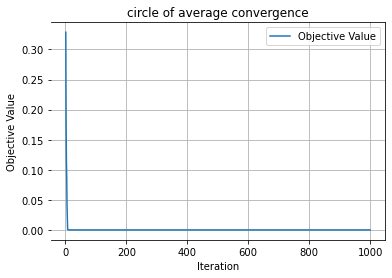

最佳解:  [1.2312433486973203e-07, 2.728598631673808e-07]
最佳值:  8.467000007783554e-07
最佳平均解值 8.467000007783554e-07


In [7]:
# list 轉 np array 方便平均計算
val_history = np.array(run_history)
#print("val_history",val_history)
# 加總每一行
total_val = val_history.sum(axis=0)
#print("total_val",total_val)

# 加總每一行
total_val = val_history.sum(axis=0)
# 跑 51次平均值
avg_val = total_val / run

# 畫採的平均收斂圖
plotIteration(avg_val, iteration)
print("最佳解: ", best_sol)
print("最佳值: " ,best_val)
print("最佳平均解值",min(avg_val))  